In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
try:
    df = pd.read_csv('spam.csv', encoding='latin1')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("File not found. Please ensure 'spam.csv' is in the directory.")
    # Creating a tiny dummy dataset just so the code runs for demonstration if you don't have a file
    data = {
        'Category': ['ham', 'spam', 'ham', 'spam', 'ham'],
        'Message': ['Hi, how are you?', 'Win a free lottery now!', 'Meeting tomorrow', 'Click here to win cash', 'Can we talk?']
    }
    df = pd.DataFrame(data)

# Display first 5 rows
display(df.head())

Data loaded successfully!


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Category
ham     4825
spam     747
Name: count, dtype: int64


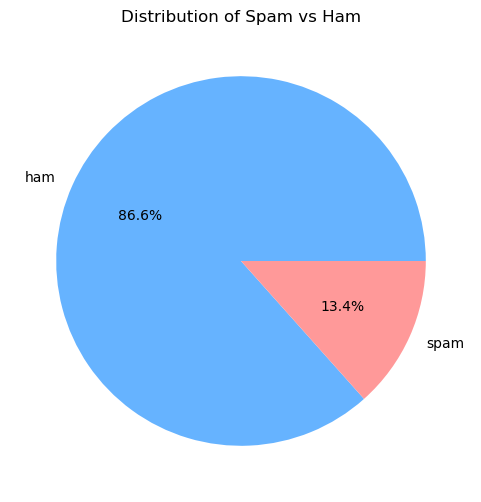

In [8]:
# Check the distribution of Spam vs Ham
print(df['Category'].value_counts())

# Visualize the distribution
plt.figure(figsize=(6,6))
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Spam vs Ham')
plt.ylabel('')
plt.show()

# Create a numerical column for the category: Spam=1, Ham=0
df['spam_flag'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [9]:
X = df['Message']
y = df['spam_flag']

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 4457
Testing samples: 1115


In [10]:
# Create a pipeline that first vectorizes the text, then applies the model
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Convert text to numbers
    ('nb', MultinomialNB())             # The Machine Learning Model
])

# Train the model
clf.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


Model Accuracy: 98.39%


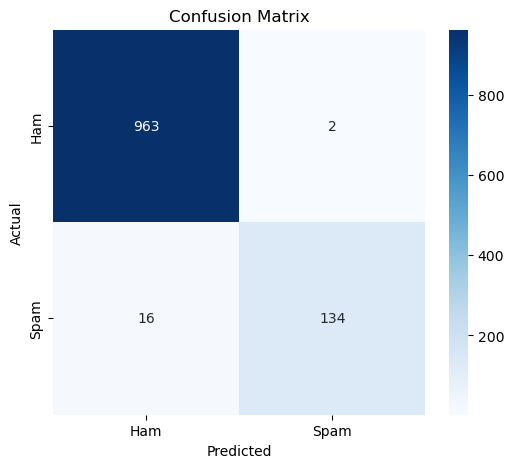

In [11]:
# Predict on test data
y_pred = clf.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix to see false positives/negatives
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Test with custom emails
emails = [
    "Hey, are we still going for lunch today?",       # Should be Ham
    "Congratulations! You have won a $1000 gift card. Click here to claim.", # Should be Spam
    "Please review the attached invoice.",             # Should be Ham
    "Urgent! Your account password has expired. Update immediately." # Should be Spam
]

# Predict
predictions = clf.predict(emails)

print("\n--- Prediction Results ---")
for email, label in zip(emails, predictions):
    result = "Spam" if label == 1 else "Not Spam (Ham)"
    print(f"Email: '{email}'\nPrediction: {result}\n")


--- Prediction Results ---
Email: 'Hey, are we still going for lunch today?'
Prediction: Not Spam (Ham)

Email: 'Congratulations! You have won a $1000 gift card. Click here to claim.'
Prediction: Spam

Email: 'Please review the attached invoice.'
Prediction: Not Spam (Ham)

Email: 'Urgent! Your account password has expired. Update immediately.'
Prediction: Spam

